# Cargar librerias

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


## Cargar Archivo .csv

In [34]:
# Configura pandas para no usar notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
# Lee el archivo CSV
df = pd.read_csv('../Data/db/Originales/inmuebles_dommies.csv')
df.dropna(inplace=True)
# Muestra las primeras filas del archivo
df.shape

(1166, 39)

## Filtrado sobre precio.

/tmp/ipykernel_878780/301453713.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Precio', 'Metros Construidos'])


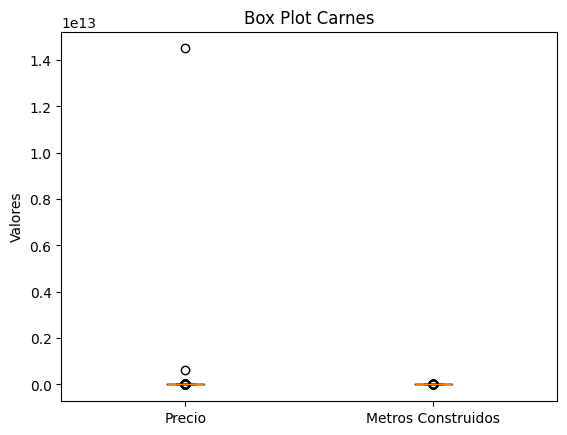

In [35]:
data = [df['precio'], df['metros_construidos']]

# Crear el gráfico de boxplot
plt.boxplot(data, labels=['Precio', 'Metros Construidos'])

# Título y etiquetas
plt.title("Box Plot Carnes")
plt.ylabel("Valores")

# Mostrar el gráfico
plt.show()

In [36]:
filtro=(df['precio'] > 60000000) & (df['precio']<10000000000)
df=df[filtro].copy()
df.shape

(1118, 39)

## Minimo y maximos de Metros Cuadrados.

In [37]:
minimo = min(df['metros_construidos'])
maximo = max(df['metros_construidos'])
print(f"Minimo de Mtr²: {minimo}, y maximo de Mtr²: {maximo}")


Minimo de Mtr²: 2.0, y maximo de Mtr²: 47679.0


## Filtrado de Metros cuadrados

In [38]:
filtro = (df['metros_construidos'] >= 40) & (df['metros_construidos'] <= maximo) & df['metros_construidos'].notnull()
df=df[filtro].copy()
df.reset_index(drop=True, inplace=True)
df.shape

(1116, 39)

## Resumen

In [39]:
# Resumen completo
resumen_completo = df.describe(include='all')
print(resumen_completo)

                            titulo localizacion        precio   baños  \
count                         1116         1116       1116.00 1116.00   
unique                         132          132           NaN     NaN   
top     Casa en venta en Cartagena    Cartagena           NaN     NaN   
freq                           218          218           NaN     NaN   
mean                           NaN          NaN 1644086011.13    3.73   
std                            NaN          NaN 1836692474.05    2.14   
min                            NaN          NaN  165000000.00    2.00   
25%                            NaN          NaN  436500000.00    3.00   
50%                            NaN          NaN  880000000.00    3.00   
75%                            NaN          NaN 2112500000.00    4.00   
max                            NaN          NaN 9500000000.00   53.00   

        habitabiones  metros_construidos  estrato  parqueadero  gas_natural  \
count        1116.00             1116.00  11

## Limpiar datos de localización donde tenga conincidencia que no sean barrios

In [40]:
# Eliminar filas donde 'localizacion' contiene los valores específicos
df = df[~df['localizacion'].str.contains('Provincia de Cartagena|Cartagena', na=False)]
df.shape

(840, 39)

# Eliminación de outlier

In [41]:
#Calcular IQR
"""
q1 = df['precio'].quantile(0.25)
q3 = df['precio'].quantile(0.75)

iqr = q3 - q1

#Definicion de limites

limite_inf = q1 -1.5*iqr
limite_sup = q3+1.5*iqr

#identificar outlayer
outlier = df[(df['precio']<limite_inf) | (df['precio']>limite_sup)]

#df=df.drop(outlier.index)
outlier.shape
"""

"\nq1 = df['precio'].quantile(0.25)\nq3 = df['precio'].quantile(0.75)\n\niqr = q3 - q1\n\n#Definicion de limites\n\nlimite_inf = q1 -1.5*iqr\nlimite_sup = q3+1.5*iqr\n\n#identificar outlayer\noutlier = df[(df['precio']<limite_inf) | (df['precio']>limite_sup)]\n\n#df=df.drop(outlier.index)\noutlier.shape\n"

In [42]:
#df=df.drop(outlier.index)
#df.reset_index()

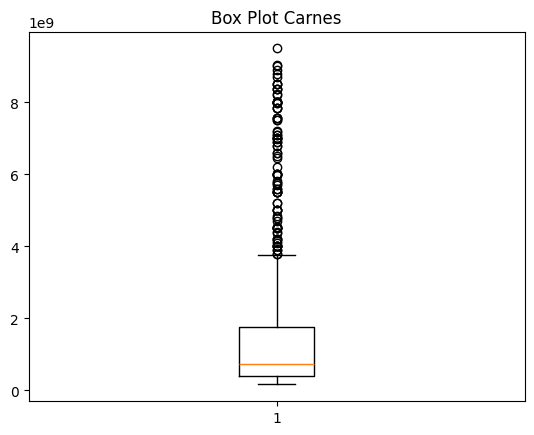

In [43]:

plt.boxplot(df['precio'])
plt.title("Box Plot Carnes")
plt.show()

## Exportar Datos limpios

In [44]:
df.to_csv('../Data/db/Procesados/data_limpia.csv', index=False)